# Modeling Damped Oscillation Motion with Experimental Data and Computational Model

In [2]:
# Import Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import model_utils
import statistics

In [3]:
# Constants
gravitational_acceleration = -9.81 # m/s^2
masses = [0.0394]  # kg, affects amplitude
spring_constants = [5]  # N/m, affects amplitude, period and frequency
coefficient_of_air_resistance = [0.00625]  # N/m, affects damping speed

In [4]:
def compute_models(index):
    def compute_acceleration(t, x, v, a):
        return -spring_constants[index] * (x - 0.077) / masses[index] - coefficient_of_air_resistance[index] * v * abs(v) / masses[index] + gravitational_acceleration
    
    data = pd.read_csv(f"Data/Data{index + 1}.csv")
    
    times = np.linspace(data["Time (s)"][0], data["Time (s)"].iat[-1], 10000)
    _, positions, velocities, accelerations = model_utils.euler_method(compute_acceleration, times=times, position_initial=data["Position (m)"][0])
    
    model_utils.graph("Position", "m", [(data["Time (s)"], data["Position (m)"], "Experimental Position"), (times, positions, "Computational")], f"Graphs/Position{index + 1}")

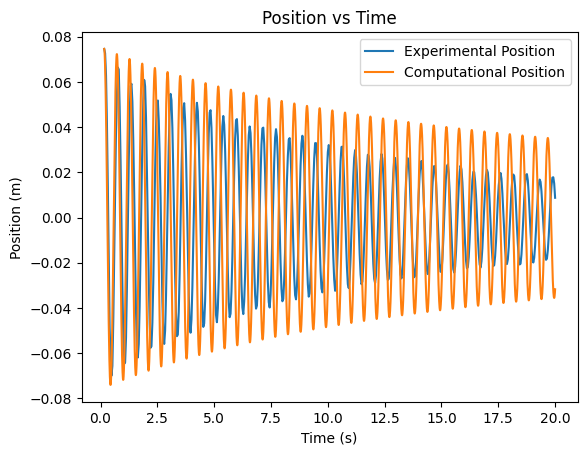

In [5]:
compute_models(0)